In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Carga de datos
# Cargar el dataset
data = pd.read_csv('../Data/Wholesale customers data.csv')
# Inspeccionar las primeras filas del dataset
data.head().T

,0,1,2,3,4
Channel,2,2,2,1,2
Region,3,3,3,3,3
Fresh,12669,7057,6353,13265,22615
Milk,9656,9810,8808,1196,5410
Grocery,7561,9568,7684,4221,7198
Frozen,214,1762,2405,6404,3915
Detergents_Paper,2674,3293,3516,507,1777
Delicassen,1338,1776,7844,1788,5185


In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns





# Verificar si hay valores nulos en el dataset
print("\nValores nulos en cada columna:")
print(data.isnull().sum())

# Resumen estadístico de las variables
print("\nResumen estadístico:")
print(data.describe())



Valores nulos en cada columna:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Resumen estadístico:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.00000

In [4]:
# 2. Exploración y Preprocesamiento de Datos
# Resumen estadístico
print(data.describe())

# Verificar valores nulos
print(data.isnull().sum())

# Estandarizar los datos (DBSCAN es sensible a la escala de las variables)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
# 3. Aplicar DBSCAN
# Inicializar el modelo DBSCAN con hiperparámetros iniciales
# eps: distancia máxima para considerar dos puntos como vecinos
# min_samples: número mínimo de puntos necesarios para formar un cluster
db = DBSCAN(eps=1.0, min_samples=5)
clusters = db.fit_predict(data_scaled)

# Agregar los resultados de clustering al dataframe original
data['cluster'] = clusters

# Contar el número de clusters formados y puntos atípicos
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_outliers = list(clusters).count(-1)

print(f"\nNúmero de clusters formados: {n_clusters}")
print(f"Número de outliers detectados: {n_outliers}")


Número de clusters formados: 6
Número de outliers detectados: 81


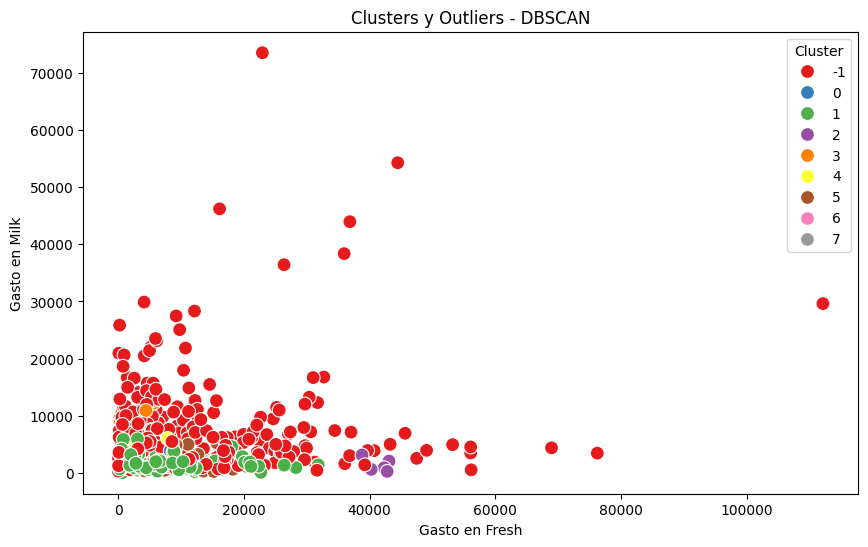

In [8]:
# 4. Visualización de clusters y outliers
# Gráfico de dispersión para dos variables representativas
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Fresh'], y=data['Milk'], hue=data['cluster'], palette='Set1', legend='full', s=100)
plt.title('Clusters y Outliers - DBSCAN')
plt.xlabel('Gasto en Fresh')
plt.ylabel('Gasto en Milk')
plt.legend(title='Cluster')
plt.show()

In [10]:
# 5. Evaluación de la calidad del agrupamiento
# Calcular el silhouette score, si hay más de un cluster
if n_clusters > 1:
    silhouette = silhouette_score(data_scaled, clusters)
    print(f"\nSilhouette Score: {silhouette:.2f}")
else:
    print("\nNo es posible calcular el Silhouette Score con un único cluster o sin clusters.")

# 6. Interpretación de resultados
# Mostrar una tabla con el número de clientes por cluster
cluster_counts = data['cluster'].value_counts()
print("\nNúmero de clientes por cluster:")
print(cluster_counts)

# Identificar clientes atípicos
outliers = data[data['cluster'] == -1]
print("\nClientes atípicos (primeras filas):")
print(outliers.head())



Silhouette Score: -0.13

Número de clientes por cluster:
cluster
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64

Clientes atípicos (primeras filas):
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
4        2       3  22615  5410     7198    3915              1777   
5        2       3   9413  8259     5126     666              1795   

   Delicassen  cluster  
0        1338       -1  
1        1776       -1  
2        7844       -1  
4        5185       -1  
5        1451       -1  


In [11]:


# 5. Evaluar la calidad del agrupamiento (Silhouette Score)
silhouette = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score: {silhouette}")

# 6. Análisis de Outliers
# Ver los outliers identificados por DBSCAN
outliers = data[data['cluster'] == -1]
print("Outliers identificados:")
print(outliers)



Silhouette Score: -0.13104288435706346
Outliers identificados:
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
4          2       3  22615   5410     7198    3915              1777   
5          2       3   9413   8259     5126     666              1795   
..       ...     ...    ...    ...      ...     ...               ...   
431        1       3   8533   5506     5160   13486              1377   
434        1       3  16731   3922     7994     688              2371   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   

     Delicassen  cluster  
0          1338       -1  
1     